<a href="https://colab.research.google.com/github/yeneua/HG-MLDL/blob/main/8_3_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
# 코랩에서 실행하는 경우에는 다음 명령을 실행하여 best-cnn-model.h5 파일을 다운로드받아 사용하세요.
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5
model = keras.models.load_model('best-cnn-model.h5')

--2022-10-20 09:57:41--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5 [following]
--2022-10-20 09:57:41--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4049416 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.h5.3’

best-cnn-model.h5.3 100%[===================>]   3.86M  --.-KB/s    in 0.07s   

2022-10-20 09:57:42 (55.8 MB/s) - ‘best-cnn-model.h5.3’ saved [4049416/4049416]



In [ ]:
# layers 속성: 케라스 모델에 추가한 층
model.layers

In [ ]:
# 합성곱 층의 가중치 조사
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)
# 커널크기 : (3,3), 깊이 : 1, 필터 : 32개
# 절편 : 32개

(3, 3, 1, 32) (32,)


In [ ]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.021033935 0.23466988


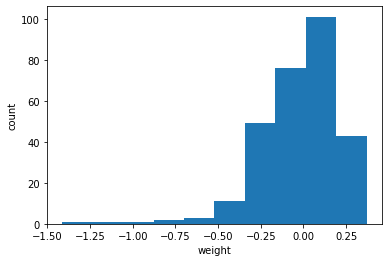

In [ ]:
# 가중치 히스토그램
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

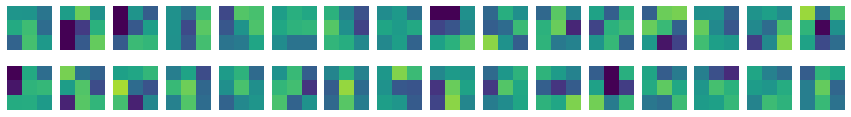

In [ ]:
# 층의 가중치 시각화
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [ ]:
# 훈련하지 않은 빈 합성곱 신경망
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [ ]:
# 첫번째 층의 가중치
no_training_conv=no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [ ]:
no_training_weights=no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.004707493 0.08168739


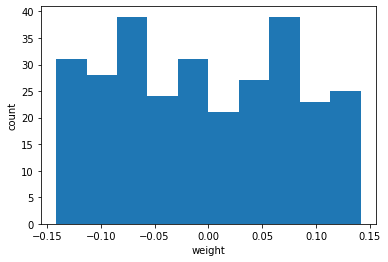

In [ ]:
# 가중치 시각화 - 히스토그램
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

In [ ]:
# 텐서플로가 신경망의 가중치를 처음 초기화할 때 균등 분포에서 랜덤하게 값 선택

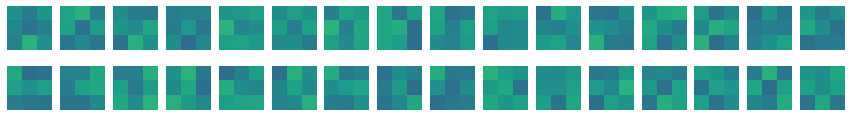

In [ ]:
# 층의 가중치 시각화
fig, axs=plt.subplots(2,16,figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [ ]:
# => 밋밋하다

In [ ]:
# 함수형 API

In [ ]:
# 이때까지 신경망 모델 만들때 -> 객체를 만들어서 Sequential 클래스 객체의 add() 메소드에 전달
dense1 = keras.layers.Dense(100,activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')

In [ ]:
# 함수형 API : 명시적으로 InputLayer 객체를 만들어서 첫번째 층의 입력으로 넣어줌
inputs = keras.Input(shape=(784,))

hidden = dense1(inputs) # dense1 객체를 함수처럼 호출
outputs = dense2(hidden)
model = keras.Model(inputs, outputs)

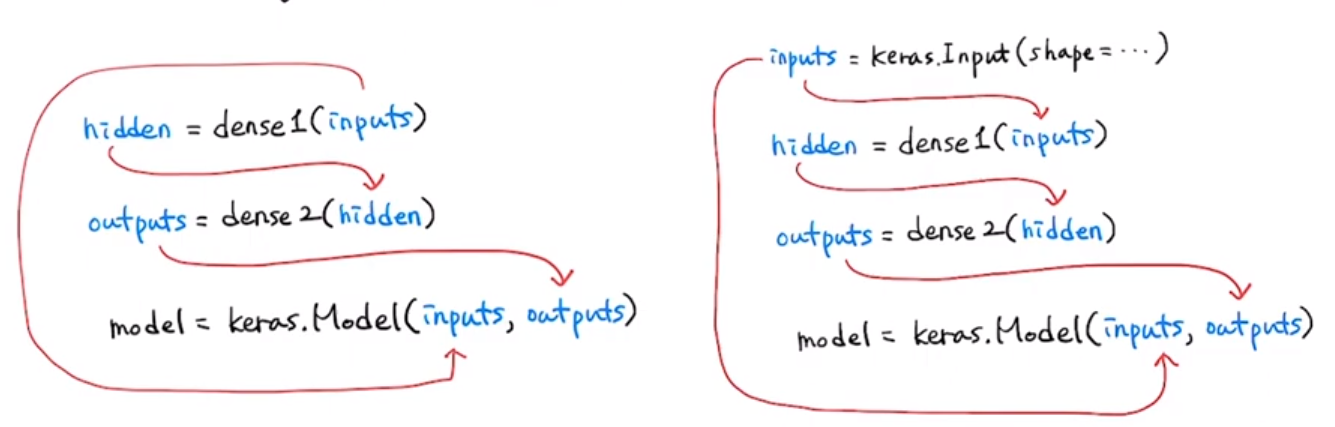

In [ ]:
# model 객체의 입력
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [ ]:
# 새로운 모델 - 첫번째 Conv2D층이 출력한 특성 맵
conv_acti = keras.Model(model.input, model.layers[0].output)

In [ ]:
# 특성맵 시각화

4422102/4422102 [==============================] - 0s 0us/step


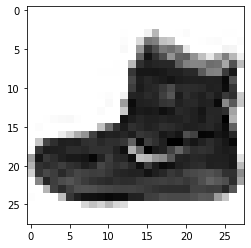

In [ ]:
# 훈련세트 첫번째 샘플 그려보기
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [ ]:
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0  # predict() 메소드는 입력의 첫번째 차원이 배치 차원일 것으로 기대
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 20ms/step


In [ ]:
print(feature_maps.shape)

(1, 28, 28, 32)


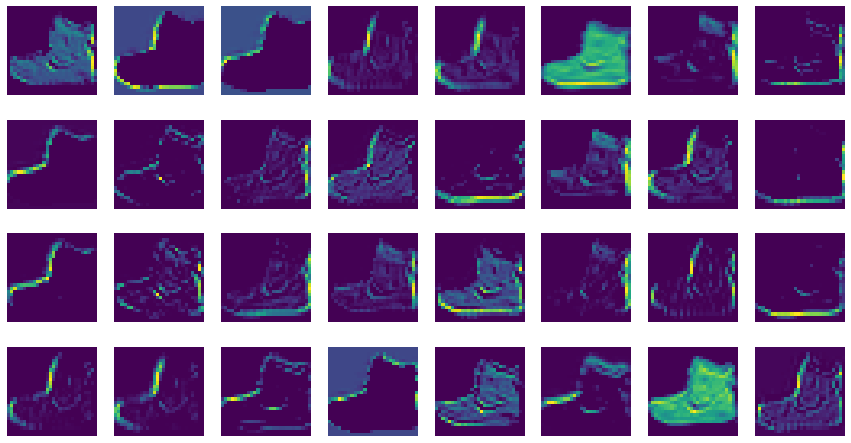

In [ ]:
fig, axs = plt.subplots(4,8,figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()

In [ ]:
# 두번째 합성곱 층이 만든 특성 맵
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [ ]:
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 80ms/step


In [ ]:
print(feature_maps.shape)

(1, 14, 14, 64)


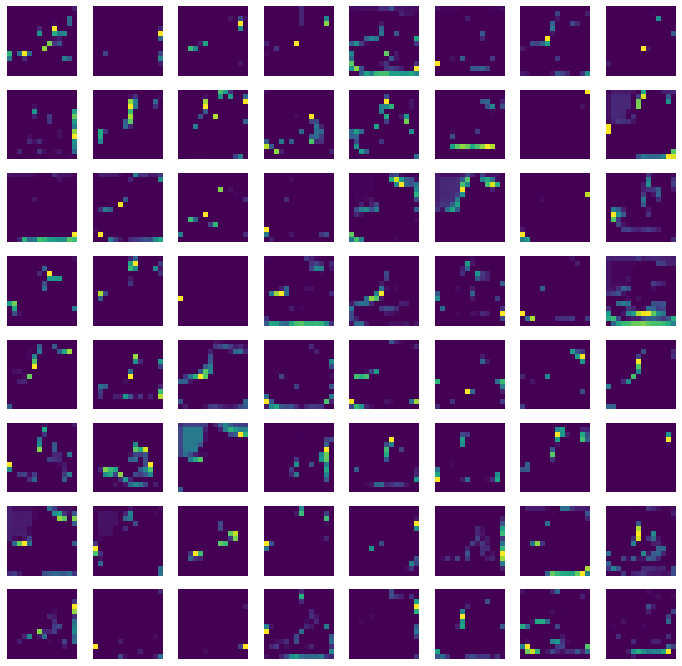

In [ ]:
fig, axs = plt.subplots(8,8,figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()

In [ ]:
# => 합성곱 층이 많이 쌓일수록 고수준 특성 학습(추상적인 특성)